<a href="https://colab.research.google.com/github/AbelPhilippe/AlzheimerClassification/blob/main/Alzheimer's_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT LIBS**

In [98]:
import os
import pandas as pd
import sklearn.model_selection
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

from pandas.plotting import scatter_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# **DATA VISUALIZATION**

In [99]:
df = pd.read_csv('/content/alzheimers_disease_data.csv')
df.head(10)

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
5,4756,86,1,1,1,30.626886,0,4.140144,0.211062,1.584922,...,0,0,9.015686,1,0,0,0,0,0,XXXConfid
6,4757,68,0,3,2,38.387622,1,0.646047,9.257695,5.897388,...,0,0,9.236328,0,0,0,0,1,0,XXXConfid
7,4758,75,0,0,1,18.776009,0,13.723826,4.649451,8.341903,...,0,0,4.517248,1,0,0,0,1,1,XXXConfid
8,4759,72,1,1,0,27.833188,0,12.167848,1.531360,6.736882,...,0,1,0.756232,0,0,1,0,0,0,XXXConfid
9,4760,87,0,0,0,35.456302,1,16.028688,6.440773,8.086019,...,0,1,4.554394,0,0,0,0,0,0,XXXConfid


In [100]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [101]:
df.isnull().sum()

,0
PatientID,0
Age,0
Gender,0
Ethnicity,0
EducationLevel,0
BMI,0
Smoking,0
AlcoholConsumption,0
PhysicalActivity,0
DietQuality,0


In [102]:
df.duplicated().sum()

np.int64(0)

In [103]:
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [105]:
df = df.drop(['PatientID', 'DoctorInCharge'], axis=1)

# **GRAPHS**

# **Demographic Details**
Age: The age of the patients ranges from 60 to 90 years.

Gender: Gender of the patients, where 0 represents Male and 1 represents Female.

Ethnicity: The ethnicity of the patients, coded as follows:

0: Caucasian

1: African American

2: Asian

3: Other
# **EducationLevel - The education level of the patients, coded as follows:**
0: None

1: High School

2: Bachelor's

3: Higher

# **Lifestyle Factors**
BMI: Body Mass Index of the patients, ranging from 15 to 40.

Smoking: Smoking status, where 0 indicates No and 1 indicates Yes.

AlcoholConsumption: Weekly alcohol consumption in units, ranging from 0 to 20.

PhysicalActivity: Weekly physical activity in hours, ranging from 0 to 10.

DietQuality: Diet quality score, ranging from 0 to 10.

SleepQuality: Sleep quality score, ranging from 4 to 10.

# **Medical History**
FamilyHistoryAlzheimers: Family history of Alzheimer's Disease, where 0 indicates No and 1 indicates Yes.

CardiovascularDisease: Presence of cardiovascular disease, where 0 indicates No and 1 indicates Yes.

Diabetes: Presence of diabetes, where 0 indicates No and 1 indicates Yes.

Depression: Presence of depression, where 0 indicates No and 1 indicates Yes.

HeadInjury: History of head injury, where 0 indicates No and 1 indicates Yes.

Hypertension: Presence of hypertension, where 0 indicates No and 1 indicates Yes.

# **Clinical Measurements**
SystolicBP: Systolic blood pressure, ranging from 90 to 180 mmHg.

DiastolicBP: Diastolic blood pressure, ranging from 60 to 120 mmHg.

CholesterolTotal: Total cholesterol levels, ranging from 150 to 300 mg/dL.

CholesterolLDL: Low-density lipoprotein cholesterol levels, ranging from 50 to 200 mg/dL.

CholesterolHDL: High-density lipoprotein cholesterol levels, ranging from 20 to 100 mg/dL.

CholesterolTriglycerides: Triglycerides levels, ranging from 50 to 400 mg/dL.

# **Cognitive and Functional Assessments**
MMSE: Mini-Mental State Examination score, ranging from 0 to 30. Lower scores indicate cognitive impairment.

FunctionalAssessment: Functional assessment score, ranging from 0 to 10. Lower scores indicate greater impairment.

MemoryComplaints: Presence of memory complaints, where 0 indicates No and 1 indicates Yes.

BehavioralProblems: Presence of behavioral problems, where 0 indicates No and 1 indicates Yes.

ADL: Activities of Daily Living score, ranging from 0 to 10. Lower scores indicate greater impairment.

# **Symptoms**
Confusion: Presence of confusion, where 0 indicates No and 1 indicates Yes.

Disorientation: Presence of disorientation, where 0 indicates No and 1
indicates Yes.

PersonalityChanges: Presence of personality changes, where 0 indicates No and 1 indicates Yes.

DifficultyCompletingTasks: Presence of difficulty completing tasks, where 0 indicates No and 1 indicates Yes.

Forgetfulness: Presence of forgetfulness, where 0 indicates No and 1 indicates Yes.

# **Diagnosis Information**
Diagnosis: Diagnosis status for Alzheimer's Disease, where 0 indicates No and 1 indicates Yes.

In [106]:
print(df.columns)

Index(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP',
       'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis'],
      dtype='object')


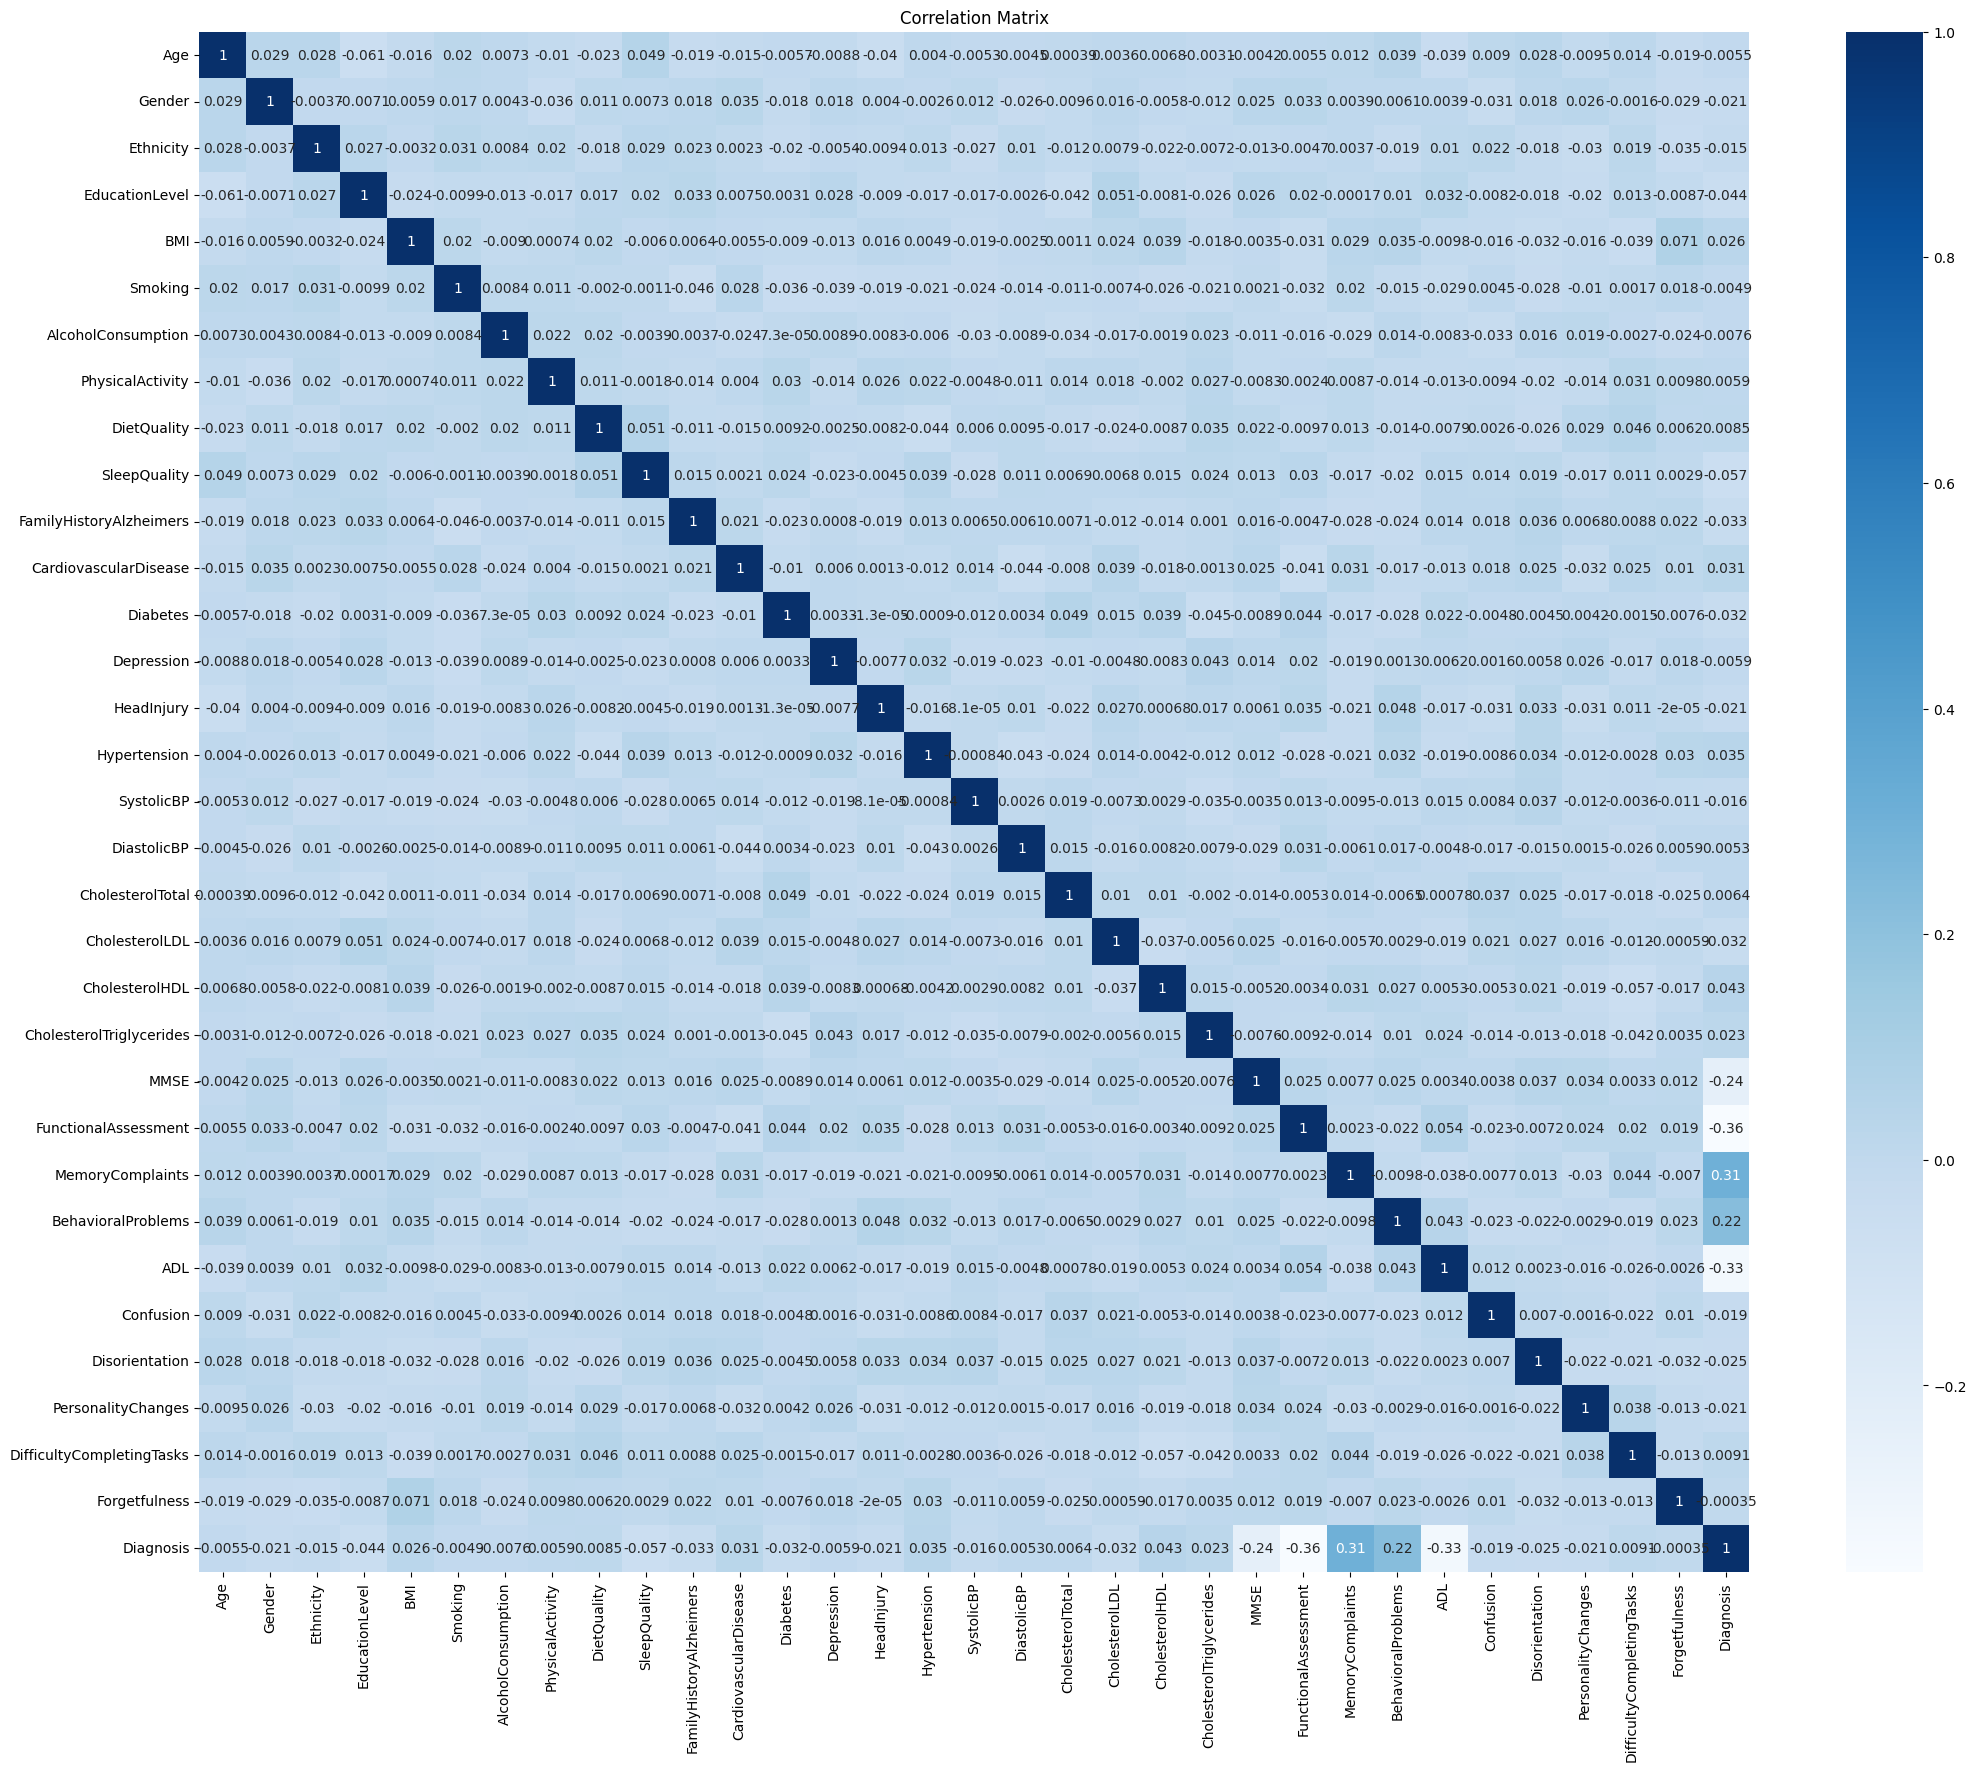

In [107]:
correlation_matrix = df.corr(numeric_only = True)
plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, annot = True, cmap="Blues")
sns.color_palette("mako", as_cmap=True)
plt.title('Correlation Matrix')
plt.show()

<Axes: xlabel='Diagnosis', ylabel='count'>

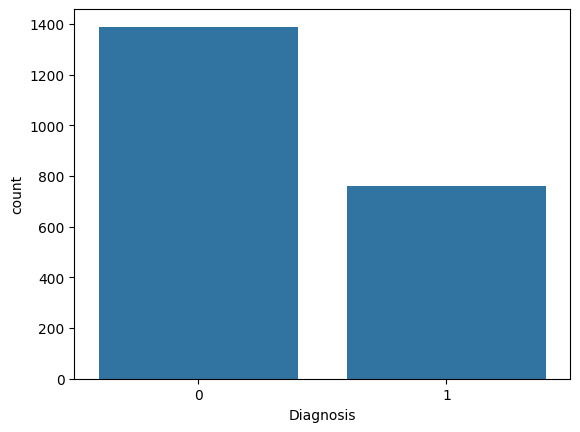

In [108]:
sns.countplot(x = df['Diagnosis'])

In [109]:
graph = px.pie(df, names = 'Diagnosis', title = 'Diagnosis')
graph.show()

In [110]:
graph = px.pie(df, names = 'Gender', title = 'Gender')
graph.show()

In [111]:
graph = px.pie(df, names = 'Age', title = 'Age')
graph.show()

In [112]:
graph = px.treemap(df, path=['Gender', 'Diagnosis'])
graph.show()

In [113]:
graph = px.treemap(df, path=['Diagnosis', 'FamilyHistoryAlzheimers'])
graph.show()

In [114]:
graph = px.treemap(df, path=['Diagnosis', 'Depression'])
graph.show()

In [115]:
graph = px.parallel_categories(df, dimensions=['Gender', 'Depression', 'Diagnosis'])
graph.show()

In [116]:
graph = px.parallel_categories(df, dimensions=['Gender', 'Depression', 'FamilyHistoryAlzheimers', 'Diagnosis'])
graph.show()

In [117]:
graph = px.parallel_categories(df, dimensions=['Smoking' ,'Diagnosis'])
graph.show()

In [118]:
graph = px.parallel_categories(df, dimensions=['Confusion' ,'Diagnosis'])
graph.show()

In [119]:
graph = px.parallel_categories(df, dimensions=['EducationLevel' ,'Diagnosis'])
graph.show()

# **STANDARLIZATION**

In [120]:
X = df.drop(columns=["Diagnosis"])
y = df["Diagnosis"]

# X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [121]:
binary_cols = [col for col in df.columns if df[col].nunique() == 2]
non_binary_cols = [col for col in df.columns if col not in binary_cols]

scaler = StandardScaler()
df[non_binary_cols] = scaler.fit_transform(df[non_binary_cols])

In [122]:
X_train, y_train

(      Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
 1433   87       1          2               1  27.764232        1   
 630    70       0          0               3  37.098744        0   
 78     82       1          3               2  15.908275        0   
 366    76       1          0               2  30.302432        1   
 1996   61       0          0               2  24.565357        1   
 ...   ...     ...        ...             ...        ...      ...   
 1638   82       1          0               2  22.874070        0   
 1095   82       0          1               3  25.522233        0   
 1130   85       0          1               2  29.216597        0   
 1294   89       1          0               1  25.741021        0   
 860    71       0          2               2  16.080044        1   
 
       AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  ...  \
 1433           16.543170          0.281379     5.923418      7.836104  ...   
 630        

In [123]:
models = {
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', random_state = 42),
    'Random Forest': RandomForestClassifier(n_estimators=100, criterion='entropy', random_state = 42),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(kernel ='rbf', random_state = 42, C = 2.0),
    'Neural Network': MLPClassifier(max_iter=1500, verbose=False, tol=0.00000100),
    'XGBoost': XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
}

Decision Tree classification report
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       277
           1       0.86      0.90      0.88       153

    accuracy                           0.91       430
   macro avg       0.90      0.91      0.90       430
weighted avg       0.91      0.91      0.91       430

[[255  22]
 [ 16 137]]


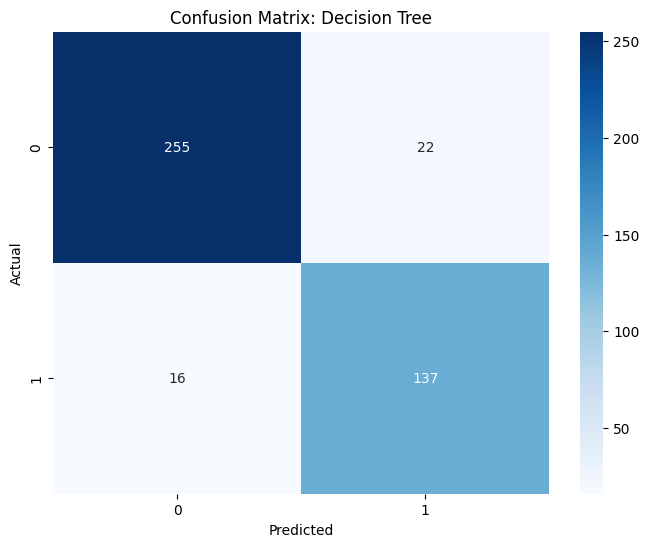

Random Forest classification report
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       277
           1       0.96      0.85      0.90       153

    accuracy                           0.93       430
   macro avg       0.94      0.92      0.93       430
weighted avg       0.94      0.93      0.93       430

[[272   5]
 [ 23 130]]


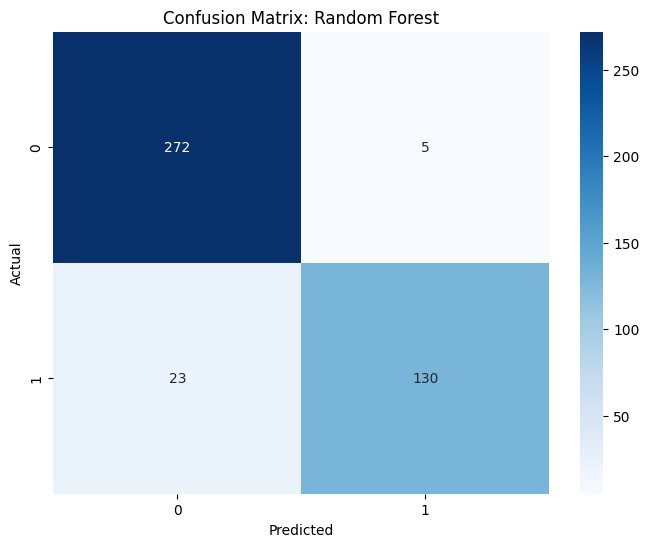

Naive Bayes classification report
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       277
           1       0.79      0.73      0.76       153

    accuracy                           0.83       430
   macro avg       0.82      0.81      0.81       430
weighted avg       0.83      0.83      0.83       430

[[247  30]
 [ 42 111]]


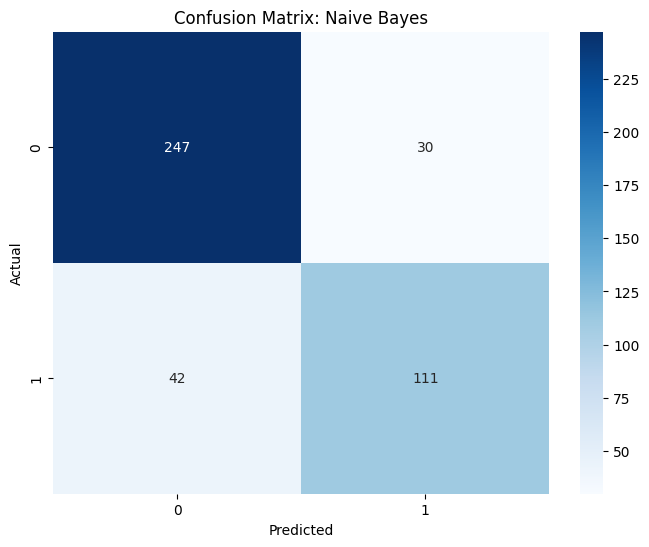

SVM classification report
              precision    recall  f1-score   support

           0       0.64      1.00      0.78       277
           1       0.00      0.00      0.00       153

    accuracy                           0.64       430
   macro avg       0.32      0.50      0.39       430
weighted avg       0.41      0.64      0.50       430

[[277   0]
 [153   0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



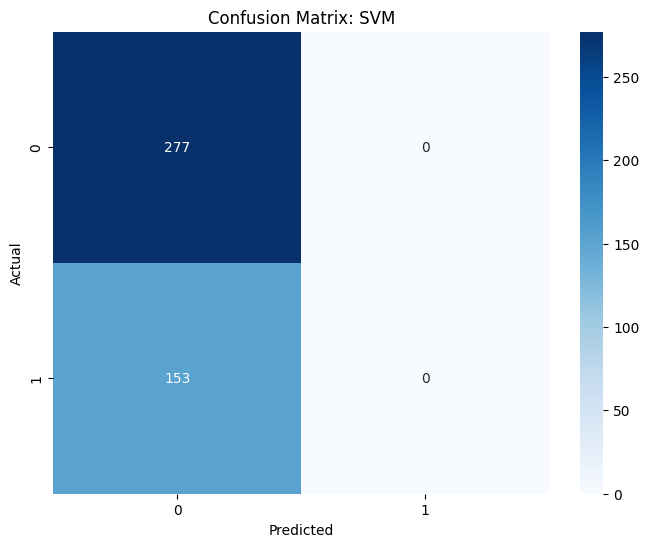

Neural Network classification report
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       277
           1       0.80      0.54      0.64       153

    accuracy                           0.79       430
   macro avg       0.79      0.73      0.75       430
weighted avg       0.79      0.79      0.78       430

[[257  20]
 [ 71  82]]


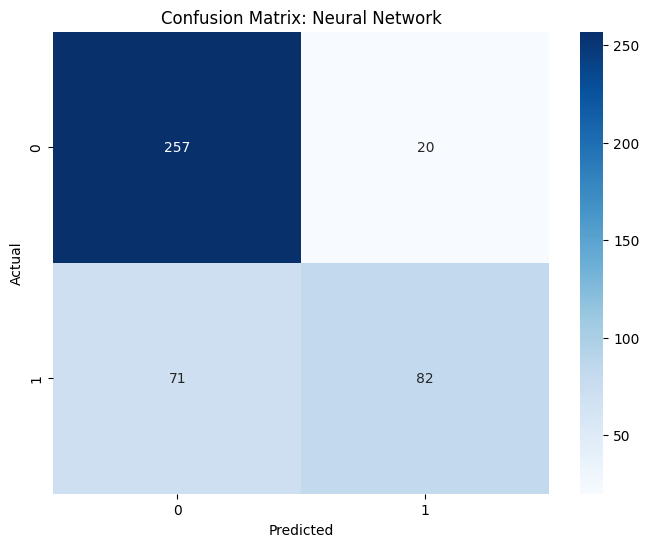

XGBoost classification report
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       277
           1       0.96      0.90      0.93       153

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.95       430
weighted avg       0.95      0.95      0.95       430

[[271   6]
 [ 15 138]]


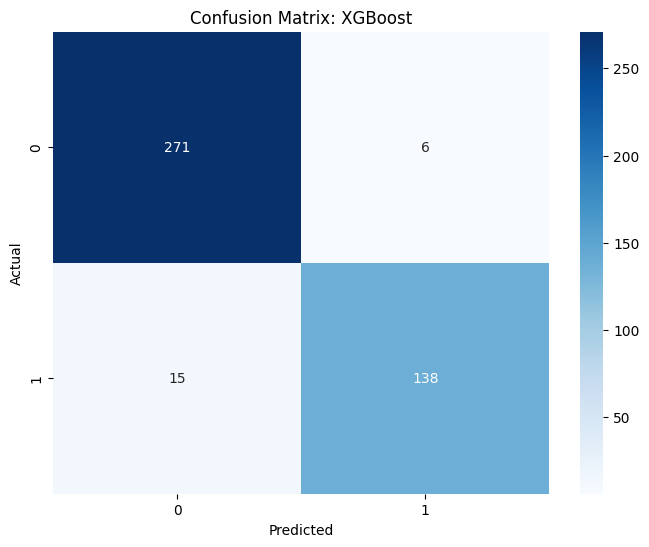

In [124]:
for name, model in models.items():
  print(name + " classification report")
  model.fit(X_train, y_train)
  predicts = model.predict(X_test)
  print(classification_report(y_test, predicts))
  cm = confusion_matrix(y_test, predicts)
  print(confusion_matrix(y_test, predicts))
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
              xticklabels = ['0', '1'],
              yticklabels = ['0', '1'])
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title("Confusion Matrix: " + name)
  plt.show()